#  ---------------------FLIGHT FARE PREIDICTION---------------------------

In [4]:
import pandas as pd 
import numpy as np 
import os , sys 
import matplotlib.pyplot as plt 
import seaborn as sns   

In [52]:
airline_price_data = pd.read_csv("Train_Data.csv")

airline_test_data = pd.read_csv("Test_set.csv")


In [44]:
airline_price_data.shape

(10683, 11)

In [45]:
airline_test_data.shape

(2671, 10)

In [46]:
airline_test_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [6]:
airline_price_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [7]:
airline_price_data.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,2137,2137,2137,2137,2137,2137,2137,2137,2137,2137,2137.000000
unique,11,44,5,6,87,199,618,301,5,7,NaN
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,17:00,19:00,2h 50m,1 stop,No info,NaN
freq,749,107,940,940,520,49,94,105,1149,1672,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9213.226486
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4804.186614
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5397.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12415.000000


In [8]:
airline_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2137 entries, 0 to 2136
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2137 non-null   object
 1   Date_of_Journey  2137 non-null   object
 2   Source           2137 non-null   object
 3   Destination      2137 non-null   object
 4   Route            2137 non-null   object
 5   Dep_Time         2137 non-null   object
 6   Arrival_Time     2137 non-null   object
 7   Duration         2137 non-null   object
 8   Total_Stops      2137 non-null   object
 9   Additional_Info  2137 non-null   object
 10  Price            2137 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 183.8+ KB


In [9]:
airline_price_data['Duration'].value_counts()

Duration
2h 50m     105
1h 30m      75
2h 45m      71
2h 35m      68
2h 55m      59
          ... 
8h 50m       1
31h 40m      1
32h 5m       1
29h 40m      1
34h 5m       1
Name: count, Length: 301, dtype: int64

In [10]:
airline_price_data.shape

(2137, 11)

In [11]:
airline_price_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

There are not much null values in the data set as I can see only route and total_stops has 1 null values each. We are going ahead with dropping the null values .

In [12]:
airline_price_data.dropna(inplace=True)

In [13]:
airline_price_data.shape

(2137, 11)

We are going to use date of journey column to create date time data and add some more columns       

In [14]:
airline_price_data["Day_of_Journey"] = pd.to_datetime(airline_price_data.Date_of_Journey, format = '%d/%m/%Y').dt.day

In [15]:
airline_price_data["Month_of_Journey"] = pd.to_datetime(airline_price_data.Date_of_Journey, format = '%d/%m/%Y').dt.month

In [16]:
airline_price_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,Multiple carriers,9/03/2019,Delhi,Cochin,DEL → BOM → COK,15:15,01:35 10 Mar,10h 20m,1 stop,No info,15200,9,3
1,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014,1,6
2,Jet Airways,27/06/2019,Delhi,Cochin,DEL → BOM → COK,07:05,12:35,5h 30m,1 stop,No info,14714,27,6
3,Jet Airways,09/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,21:20,13h 20m,1 stop,In-flight meal not included,11087,9,3
4,Jet Airways,24/03/2019,Kolkata,Banglore,CCU → BOM → BLR,08:25,16:20,7h 55m,1 stop,No info,13759,24,3


In [17]:
airline_price_data.drop(['Date_of_Journey'], axis =1 , inplace =True)

In [18]:
# now we are goingto convert departure time adnd convert it into hour and minute
airline_price_data['Dep_hour'] = pd.to_datetime(airline_price_data['Dep_Time']).dt.hour
# now we are goingto convert departure time adnd convert it into hour and minute
airline_price_data['Dep_min'] = pd.to_datetime(airline_price_data['Dep_Time']).dt.minute
# now we are goingto convert arrival time adnd convert it into hour and minute

airline_price_data['Arrival_hour'] = pd.to_datetime(airline_price_data['Arrival_Time']).dt.hour
# now we are goingto convert arrival time adnd convert it into hour and minute
airline_price_data['Arrival_min'] = pd.to_datetime(airline_price_data['Arrival_Time']).dt.minute

C:\Users\asus\AppData\Local\Temp\ipykernel_7304\1615680174.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  airline_price_data['Dep_hour'] = pd.to_datetime(airline_price_data['Dep_Time']).dt.hour
C:\Users\asus\AppData\Local\Temp\ipykernel_7304\1615680174.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  airline_price_data['Dep_min'] = pd.to_datetime(airline_price_data['Dep_Time']).dt.minute
C:\Users\asus\AppData\Local\Temp\ipykernel_7304\1615680174.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  airline_price_data['Arrival_hour'] = pd.to_datetime(airline_price_data

In [19]:
airline_price_data.drop(['Dep_Time'] , axis =1 , inplace= True)
airline_price_data.drop(['Arrival_Time'] , axis =1 , inplace= True)

In [20]:
duration = list(airline_price_data["Duration"])

for i in range (len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip()+" 0m"
        else :
            duration[i] = "0h " + duration[i]
duration_hours = [int(duration[i].split(sep="h")[0]) for i in range(len(duration))]
duration_mins= [int(duration[i].split(sep='m')[0].split()[-1]) for i in range(len(duration))]


In [21]:
airline_price_data['Duration_Hours'] = duration_hours
airline_price_data["Duration_Minutes"] = duration_mins

In [22]:
airline_price_data.drop(["Duration"], axis=1, inplace= True)

In [23]:
airline_price_data["Total_Stops"].value_counts()

Total_Stops
1 stop      1149
non-stop     682
2 stops      296
3 stops        9
4 stops        1
Name: count, dtype: int64

# Handling the categorical Data 

we can use one hot encoding for the column Airline
since the data is not ordinal. For categorical data like nominal data type we can use Onehotencoding but for categorical data like Ordinal which has certain rank attach to it. we use LabelEncoder.

<Axes: xlabel='count', ylabel='Airline'>

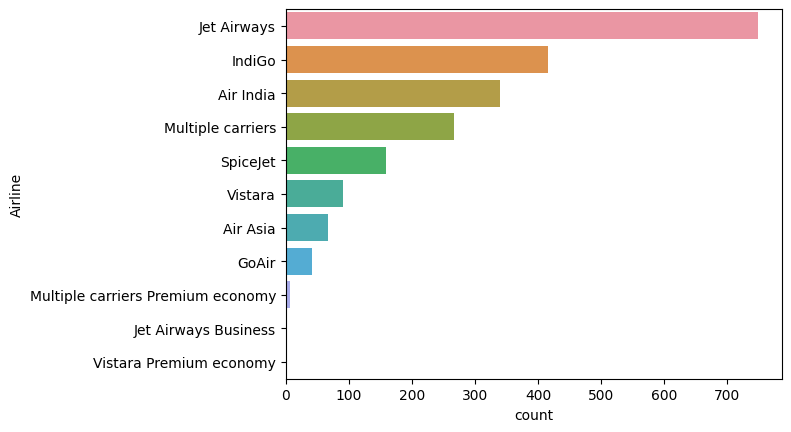

In [24]:
airline_unique= airline_price_data["Airline"].value_counts()
df= pd.DataFrame(airline_unique).reset_index()
sns.barplot( x= df["count"], y = df["Airline"] )

THE Jet Airwawys see most number of flights 

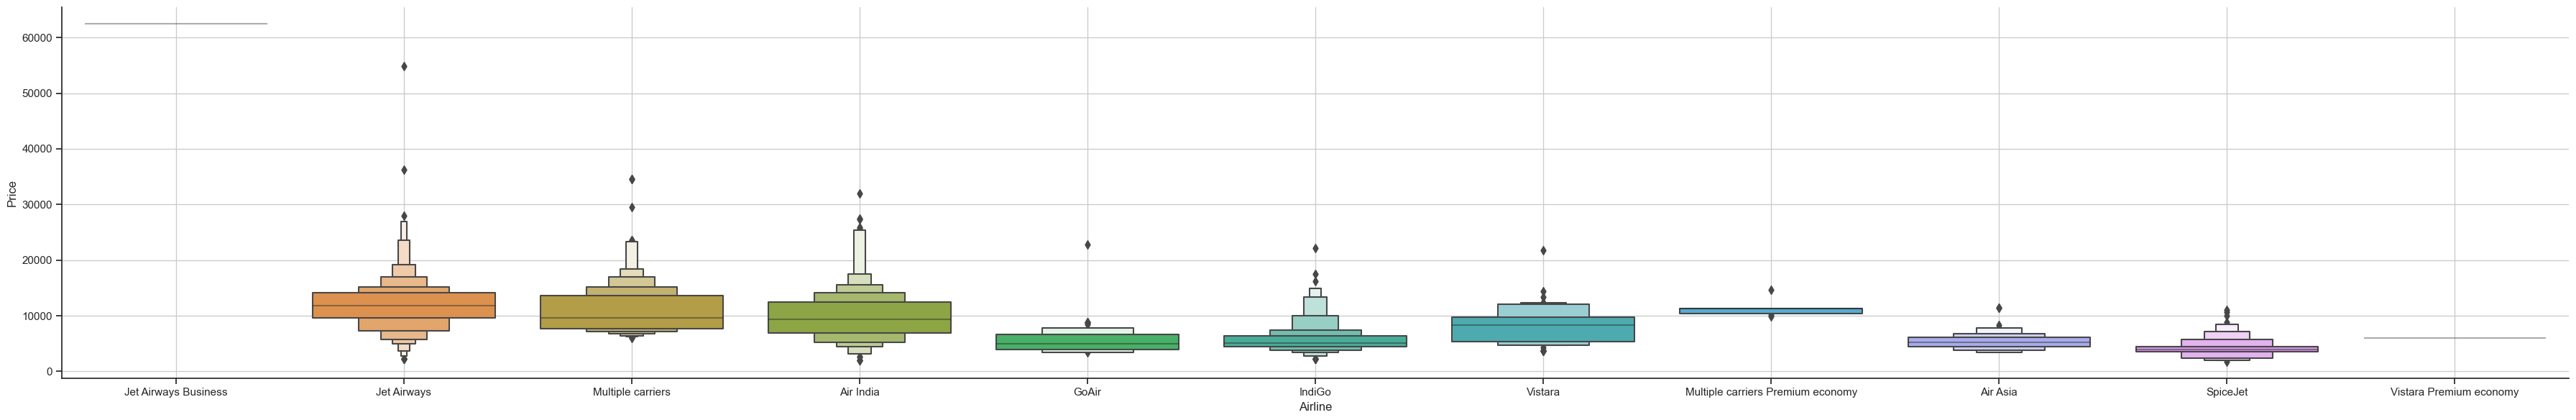

In [25]:
sns.set(style= "ticks")
sns.catplot(y ="Price", x = "Airline", data=airline_price_data.sort_values("Price", ascending=False), kind="boxen", height=6, aspect=6)
plt.grid()
plt.show()

# we are going to create dummy variable for the Airline

In [26]:
Airline = airline_price_data[["Airline"]]
Airline =pd.get_dummies(Airline, drop_first=True, dtype=int)
Airline.head(5)

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0


# We are going to check other categorical data which is source

In [27]:
airline_price_data["Source"].value_counts()

Source
Delhi       940
Kolkata     567
Banglore    419
Mumbai      139
Chennai      72
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Source'>

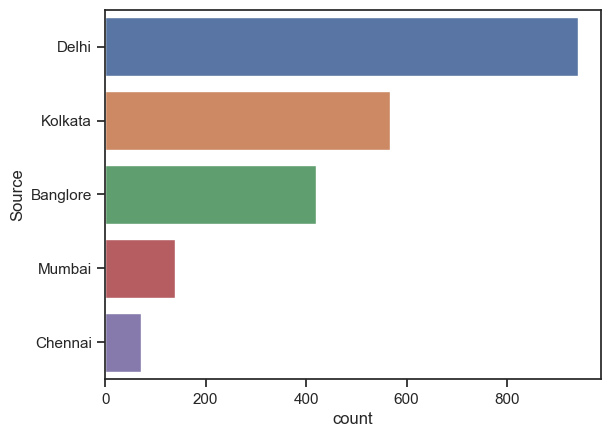

In [28]:
airline_source_unique= airline_price_data["Source"].value_counts()
df= pd.DataFrame(airline_source_unique).reset_index()
sns.barplot( x= df["count"], y = df["Source"] )

MAXIMUM Flights boarded from the delhi .

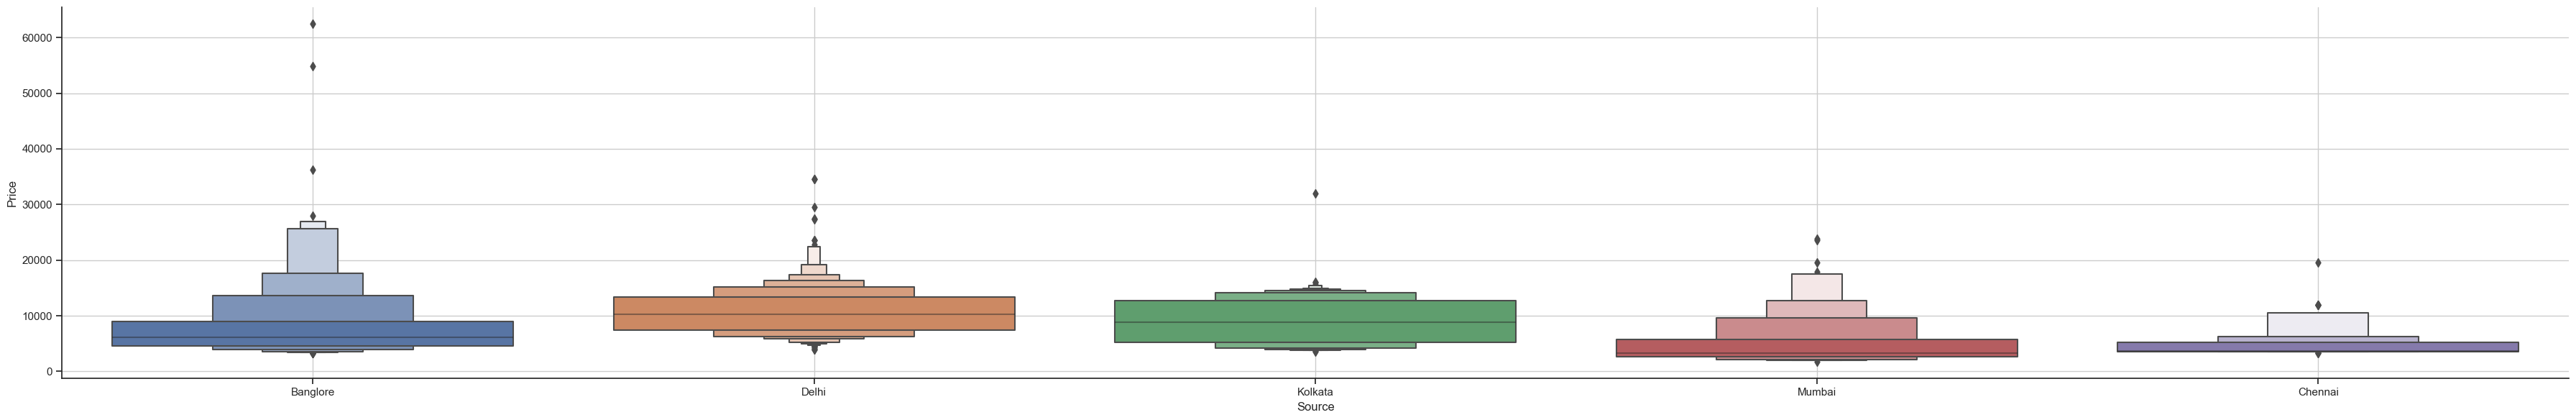

In [29]:
sns.set(style= "ticks")
sns.catplot(y ="Price", x = "Source", data=airline_price_data.sort_values("Price", ascending=False), kind="boxen", height=6, aspect=6)
plt.grid()
plt.show()

Though banglore was third in rank of boarding flight, the price of boarding banglore is high than delhi and kolkata which out top two.

# Lets create dummy variable for the Source column too

In [30]:
Source = airline_price_data['Source']
Source = pd.get_dummies(Source, drop_first=True,dtype=int)
Source

,Chennai,Delhi,Kolkata,Mumbai
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,0,0
4,0,0,1,0
...,...,...,...,...
2132,0,0,1,0
2133,0,1,0,0
2134,0,1,0,0
2135,0,1,0,0


Lets check other categorical feature. Destination Route , Total_stops etc.
Destination 

In [31]:
Destination = airline_price_data['Destination']
Destination = pd.get_dummies(Destination, drop_first=True,dtype=int)
Destination

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,1
4,0,0,0,0,0
...,...,...,...,...,...
2132,0,0,0,0,0
2133,1,0,0,0,0
2134,1,0,0,0,0
2135,1,0,0,0,0


### Handle Route, Total_stops and Additional Info

In [32]:
airline_price_data["Route"]

0             DEL → BOM → COK
1       DEL → JAI → BOM → COK
2             DEL → BOM → COK
3             BLR → BOM → DEL
4             CCU → BOM → BLR
                ...          
2132          CCU → BOM → BLR
2133          DEL → BOM → COK
2134          DEL → LKO → COK
2135          DEL → BOM → COK
2136                CCU → BLR
Name: Route, Length: 2137, dtype: object

In [33]:
airline_price_data["Total_Stops"]

0         1 stop
1        2 stops
2         1 stop
3         1 stop
4         1 stop
          ...   
2132      1 stop
2133      1 stop
2134      1 stop
2135      1 stop
2136    non-stop
Name: Total_Stops, Length: 2137, dtype: object

#### BOTH ROUTE AND TOTALSTOPS are same type of feature. For sake of easiness of doing thing i might going to drop the feature Route.

In [34]:
(airline_price_data["Additional_Info"].value_counts()/airline_price_data["Additional_Info"].count())*100

Additional_Info
No info                         78.240524
In-flight meal not included     18.343472
No check-in baggage included     3.041647
1 Long layover                   0.140384
Change airports                  0.140384
Business class                   0.046795
No Info                          0.046795
Name: count, dtype: float64

#### Around 79% of data in Addtional Info is No info and rest 0.02 data is No Info which is similar thing since 80 of data is of our no use. I am going to drop this feature going ahead building prediction model. 

### Now I am going to go for the handling the feature Total_stops


In [35]:
airline_price_data["Total_Stops"].value_counts()

Total_Stops
1 stop      1149
non-stop     682
2 stops      296
3 stops        9
4 stops        1
Name: count, dtype: int64

In [36]:
airline_price_data.groupby(["Total_Stops"])['Price'].mean().sort_values(ascending= False)

Total_Stops
4 stops     17686.000000
3 stops     13234.333333
2 stops     13085.300676
1 stop      10599.006963
non-stop     5132.495601
Name: Price, dtype: float64

    Total_Stops Avg_price
    4 stops     17686.000000
    3 stops     13112.000000
    2 stops     12715.807895
    1 stop      10594.123556
    non-stop     5024.900315

the average price seem to be less for 0 stops (non-stop) or direct flights. Not only that with each increase in stop the average price also increase

#### Now lets lable encode the stops value present in the Total_Stops

In [37]:
airline_price_data["No_of_stops"]= airline_price_data["Total_Stops"].replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4})
airline_price_data.head(5)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_Hours,Duration_Minutes,No_of_stops
0,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,15200,9,3,15,15,1,35,10,20,1
1,Jet Airways,Delhi,Cochin,DEL → JAI → BOM → COK,2 stops,No info,13014,1,6,9,40,12,35,26,55,2
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,14714,27,6,7,5,12,35,5,30,1
3,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,11087,9,3,8,0,21,20,13,20,1
4,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,1 stop,No info,13759,24,3,8,25,16,20,7,55,1


In [38]:
airline_price_data.drop(['Route','Total_Stops','Additional_Info'], axis=1, inplace=True)


In [39]:
airline_price_data.head(5)

,Airline,Source,Destination,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_Hours,Duration_Minutes,No_of_stops
0,Multiple carriers,Delhi,Cochin,15200,9,3,15,15,1,35,10,20,1
1,Jet Airways,Delhi,Cochin,13014,1,6,9,40,12,35,26,55,2
2,Jet Airways,Delhi,Cochin,14714,27,6,7,5,12,35,5,30,1
3,Jet Airways,Banglore,New Delhi,11087,9,3,8,0,21,20,13,20,1
4,Jet Airways,Kolkata,Banglore,13759,24,3,8,25,16,20,7,55,1


In [40]:
airline_concat = pd.concat([airline_price_data, Destination, Source, Airline], axis =1)

In [41]:
airline_concat

,Airline,Source,Destination,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,...,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,Multiple carriers,Delhi,Cochin,15200,9,3,15,15,1,35,...,0,0,0,0,0,1,0,0,0,0
1,Jet Airways,Delhi,Cochin,13014,1,6,9,40,12,35,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,14714,27,6,7,5,12,35,...,0,0,0,1,0,0,0,0,0,0
3,Jet Airways,Banglore,New Delhi,11087,9,3,8,0,21,20,...,0,0,0,1,0,0,0,0,0,0
4,Jet Airways,Kolkata,Banglore,13759,24,3,8,25,16,20,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2132,Jet Airways,Kolkata,Banglore,14781,18,5,14,5,19,50,...,0,0,0,1,0,0,0,0,0,0
2133,Multiple carriers,Delhi,Cochin,11667,12,6,7,5,19,15,...,0,0,0,0,0,1,0,0,0,0
2134,IndiGo,Delhi,Cochin,7398,9,4,21,50,3,35,...,0,0,1,0,0,0,0,0,0,0
2135,Air India,Delhi,Cochin,8582,24,5,23,0,19,15,...,1,0,0,0,0,0,0,0,0,0


In [42]:
airline_concat.drop(['Airline', 'Source', 'Destination'], axis= 1, inplace=True)

#### Performing all the same transformatons to the Test csv set too     

In [64]:

test_data = pd.read_csv(r'Test_set.csv')

#********************************************************************

#DATA PREPROCESSING

#number of rows and columns in a dataset
test_data.shape

#checking number of missing values
test_data.isnull().sum()

#Route--> null values=1 and Total_Stops--> null values=1, so we can ignore them
test_data.dropna(inplace=True)
#now check again
test_data.isnull().sum()

#statistical analysis(description)
test_data.describe()

#********************************************************************

#EXPLORATORY DATA ANALYSIS

#converting to 'datetime'
test_data['Date_of_Journey'] = pd.to_datetime(test_data.Date_of_Journey, format='%d/%m/%Y')

#adding new columns(Journey_day, Journey_month, Journey_year) out of column(Date_of_Journey)
#extracting day
test_data['Journey_day'] = test_data['Date_of_Journey'].dt.day
#extracting month
test_data['Journey_month'] = test_data['Date_of_Journey'].dt.month

#drop column 'Date_of_Journey' as it's of no use now
test_data.drop(['Date_of_Journey'], axis=1, inplace=True)

#converting 'Arrival_Time' to 'datetime'
test_data['Arrival_Time'] = pd.to_datetime(test_data.Arrival_Time)

#adding new columns(Arrival_hour, Arrival_minute)
#extracting Arrival hour
test_data['Arrival_hour'] = test_data['Arrival_Time'].dt.hour
#extracting Arrival minute
test_data['Arrival_minute'] = test_data['Arrival_Time'].dt.minute

#drop column 'Arrival_Time' as it's of no use now
test_data.drop(['Arrival_Time'], axis=1, inplace=True)

#converting 'Dep_Time' to 'datetime'
test_data['Dep_Time'] = pd.to_datetime(test_data.Dep_Time)

#adding new columns(Dep_hour, Dep_minute)
#extracting Depature hour
test_data['Dep_hour'] = test_data['Dep_Time'].dt.hour
#extracting Departure minute
test_data['Dep_minute'] = test_data['Dep_Time'].dt.minute

#drop column 'Dep_Time' as it's of no use now
test_data.drop(['Dep_Time'], axis=1, inplace=True)

# 'Duration'--> Time taken by plane to reach destination.
# It is the differnce between Departure time and Arrival time

# Assigning and converting Duration column into list to extract values one-by-one in for-loop
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute #why strip is used here?
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
    
#adding columns 'Duration_hours' and 'Duration_minutes' into dataset 'train_data'
test_data['Duration_hours'] = duration_hours
test_data['Duration_minutes'] = duration_mins

#drop column 'Duration' as it's of no use now
test_data.drop(['Duration'], axis=1, inplace=True)

#********************************************************************

#HANDLING CATEGORICAL DATA

#checking distribution of categorical data(Airline)
print(test_data.Airline.value_counts(),"\n")

#As Airline--> Nominal Categorical Data, so we perform 'OneHotEncoding'
#make a dataframe named 'Airline'
Airline = test_data['Airline']
Airline = pd.get_dummies(Airline, drop_first=True, dtype= int)

#checking distribution of categorical data(Source)
print(test_data.Source.value_counts(),"\n")

#As Source--> Nominal Categorical Data, so we perform 'OneHotEncoding'
#make a dataframe named 'Source'
Source = test_data['Source']
Source = pd.get_dummies(Source, drop_first=True, dtype= int)

#checking distribution of categorical data(Destination)
print(test_data.Destination.value_counts(),"\n")

#As Destination--> Nominal Categorical Data, so we perform 'OneHotEncoding'
#make a dataframe named 'Destination'
Destination = test_data['Destination']
Destination = pd.get_dummies(Destination, drop_first=True, dtype= int)

#checking distribution of categorical data(Route)
test_data['Route'].value_counts()

#as 'Total_Stops' and 'Route' are related(dependent on) to each other, so we can drop 'Route'.
test_data.drop(['Route'], axis=1, inplace=True)

#checking distribution of categorical data(Total_Stops)


#As Total_Stops --> Ordinal Categorical Data, so we perform 'LabelEncoding'
#we assign values in 'Total_Stops' with corresponding keys.
test_data.replace({'Total_Stops':{'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}},inplace=True)
test_data.head()

#checking distribution of categorical data(Additional_Info)
print(test_data.Additional_Info.value_counts(),"\n")

#as 80% of information in 'Additional_Info' is 'No info', hence we can drop this column
test_data.drop(['Additional_Info'], axis=1, inplace=True)

#conactenate dataframe--> (train_data, Airline, Source, Destination)
test_data = pd.concat([test_data, Airline, Source, Destination], axis=1)

#drop columns 'Airline, Source, Destination' as these are now of no further use
test_data.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)
test_data.drop(['Unnamed: 0'], axis =1 , inplace= True)
#shape of dataframe 'train_data'
print(test_data.shape)

#check which two(30-28=2) columns are missing in 'test_data'
print(test_data.columns)



#print first 5 rows
test_data.head()

Airline
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: count, dtype: int64 

Source
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: count, dtype: int64 

Destination
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: count, dtype: int64 

Additional_Info
No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Business class                     1
Change airports                    1
Name: c

C:\Users\asus\AppData\Local\Temp\ipykernel_7304\1183880319.py:38: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data['Arrival_Time'] = pd.to_datetime(test_data.Arrival_Time)
C:\Users\asus\AppData\Local\Temp\ipykernel_7304\1183880319.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data['Dep_Time'] = pd.to_datetime(test_data.Dep_Time)


,Total_Stops,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,4,25,17,30,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,10,20,6,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,0,19,15,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,21,0,8,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,2,45,23,55,2,50,0,...,0,0,0,0,0,0,1,0,0,0


## Rest of Complete Modeling is in in vs.code with complete pipelines